# Example Notebook

This notebook walks you through an example of using UGAF for analysis of a collection of graphs.

In [1]:
from ugaf.ugaf import UGAF

import pandas as pd
import os

In [2]:
base_dir = os.getcwd() + "/example_data/"

In [3]:
ugaf = UGAF()

In [4]:
edge_csv_path = base_dir + "edge_file.csv.example"
node_graph_map_csv_path = base_dir + "node_graph_mapping_file.csv.example"
graph_label_path = base_dir + "graph_label_file.csv.example"

## Building UGAF object

The `build_graph_collection` method takes as input paths to the edge file and node-graph mapping.
In addition, you can filter sub-graph components to only the largest connected component with `filter_for_largest_cc` and also
reset node indices, so nodes indices start from 0. A mapping of old-to-new node indices will be saved.

In [5]:
ugaf.build_graph_collection(edge_csv_path, node_graph_map_csv_path, filter_for_largest_cc=True, reset_node_indices=True)

2023-10-20 13:16:09.537 | INFO     | ugaf.graph_collection:load_graphs:32 - ===================
2023-10-20 13:16:09.539 | INFO     | ugaf.graph_collection:load_graphs:33 - Reading edge file
2023-10-20 13:16:09.571 | INFO     | ugaf.graph_collection:load_graphs:39 - Parsing graph data into individual graphs
Building subgraphs:: 100%|██████████████| 405/405 [00:00<00:00, 1504.21it/s]
2023-10-20 13:16:09.847 | INFO     | ugaf.graph_collection:filter_collection_for_largest_connected_component:68 - ===================
2023-10-20 13:16:09.847 | INFO     | ugaf.graph_collection:filter_collection_for_largest_connected_component:69 - Filtering graphs for to contain only the largest connected component
Resrting node indices:: 100%|██████████| 405/405 [00:00<00:00, 14976.75it/s]


## Graph Collection Statistics

The `get_gc_stats` provides a set of basic stats about the collection of graphs.

Building stats:: 100%|█████████████████| 405/405 [00:00<00:00, 44419.57it/s]


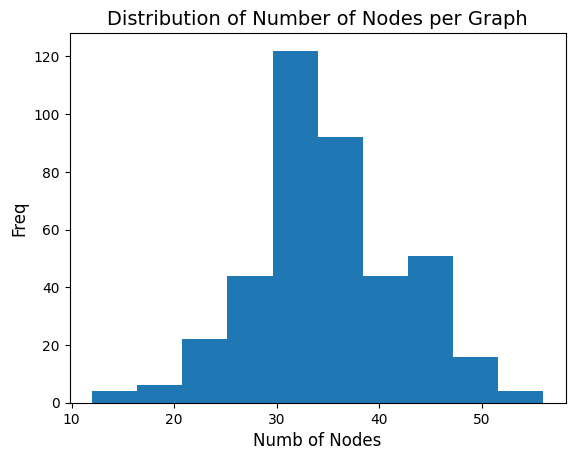

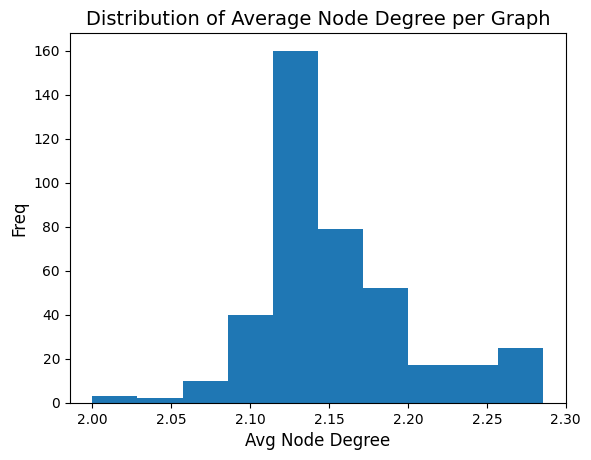

In [6]:
ugaf.get_gc_stats()

## Building Node Embeddings

UGAF comes with some built-in `node` and `structural` embedding algorithms. Here, we showcase `Node2Vec` and `LSME`.
This is done by using the method `build_node_embedding`, which takes as input `embedding_type` and `emb_dim` as input.
You can run multiple embeddings, and they each will get saved, so downstream anlysis is easier.

In [7]:
ugaf.build_node_embedding(embedding_type="lsme", emb_dim=16)

2023-10-20 13:16:10.895 | INFO     | ugaf.ugaf:build_node_embedding:91 - Running lsme embedding
Building embeddings: 100%|████████████████| 405/405 [00:30<00:00, 13.44it/s]
2023-10-20 13:16:41.041 | INFO     | ugaf.ugaf:normalize_embedding:106 - Normalizing the embedding data
Normalizing: 100%|███████████████████████| 405/405 [00:01<00:00, 395.95it/s]


In [8]:
ugaf.build_node_embedding(embedding_type="node2vec", emb_dim=16)

2023-10-20 13:16:42.070 | INFO     | ugaf.ugaf:build_node_embedding:91 - Running node2vec embedding
Building embeddings: 100%|████████████████| 405/405 [00:11<00:00, 36.70it/s]
2023-10-20 13:16:53.106 | INFO     | ugaf.ugaf:normalize_embedding:106 - Normalizing the embedding data
Normalizing: 100%|███████████████████████| 405/405 [00:01<00:00, 377.26it/s]


## Building Graph Embeddings

Now that we have a few node and structural embeddings built for the graphs, we can use them to build graph embeddings.
You can build several different graph embedding based on the flavour of node embeddings you have created in the previous step.
This is done by using the method `build_graph_embedding` which takes as `source_embedding` as input. This will be the type of node/structural embedding created in the previous step.

In [11]:
ugaf.build_graph_embedding(source_embedding="lsme")

2023-10-20 13:17:10.324 | INFO     | ugaf.ugaf:build_graph_embedding:119 - Creating incidence matrix
Loading embeddings: 100%|█████████████| 405/405 [00:00<00:00, 651589.23it/s]


In [12]:
ugaf.build_graph_embedding(source_embedding="node2vec")

2023-10-20 13:17:17.498 | INFO     | ugaf.ugaf:build_graph_embedding:119 - Creating incidence matrix
Loading embeddings: 100%|█████████████| 405/405 [00:00<00:00, 701939.31it/s]


## Analysing Graph Embeddings

One type of analysis you can run on the graph embeddings is to reduce the dimension of the embedding to 2-D using `UMAP` or `tSNE` or `PCA` and graph/analyze any clusters.
This can be done by using `reduce_graph_embedding_dimension` method, which takes as input the algorithm type and the source embedding.

In [14]:
ugaf.reduce_graph_embedding_dimension(algorithm="pca", source_embedding="lsme")
ugaf.reduce_graph_embedding_dimension(algorithm="umap", source_embedding="lsme")
ugaf.reduce_graph_embedding_dimension(algorithm="tsne", source_embedding="lsme")

2023-10-20 13:22:50.019 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:188 - Running PCA
2023-10-20 13:22:50.021 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:174 - Running UMAP
2023-10-20 13:22:54.999 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:181 - Running tSNE


In [15]:
ugaf.reduce_graph_embedding_dimension(algorithm="pca", source_embedding="node2vec")
ugaf.reduce_graph_embedding_dimension(algorithm="umap", source_embedding="node2vec")
ugaf.reduce_graph_embedding_dimension(algorithm="tsne", source_embedding="node2vec")

2023-10-20 13:23:04.131 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:188 - Running PCA
2023-10-20 13:23:04.133 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:174 - Running UMAP
2023-10-20 13:23:05.771 | INFO     | ugaf.ugaf:reduce_graph_embedding_dimension:181 - Running tSNE


You can now plot the 2D version of the embeddings using the method `plot_graph_embedding` which takes as input: `source_embedding`, `dim_reduc_algo` and `color_using_grpah_labels`. The `color_using_grpah_labels` parameter can be set to `True` if we have loaded graph labels, but since UGAF is an unsupervised framework, you can plot embeddings without any label.

2023-10-20 13:26:08.788 | INFO     | ugaf.ugaf:plot_graph_embedding:200 - Plotting 2-dimensional graph embeddings
/home/ash/anaconda3/envs/ugaf/lib/python3.11/site-packages/ugaf/ugaf.py:236: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, cmap='viridis', s=100)


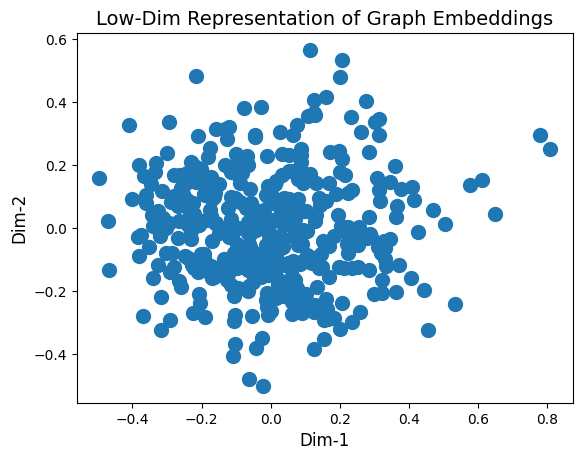

In [16]:
ugaf.plot_graph_embedding(source_embedding="lsme", dim_reduc_algo="pca", color_using_grpah_labels=False)

You can also add graph labels to the dataset and color the embedding graph using the labels.

In [18]:
ugaf.add_graph_labels(graph_label_path)

2023-10-20 13:27:25.055 | INFO     | ugaf.graph_collection:assign_graph_labels:122 - Reading and assigning graph labels
Assigning graph labels:: 100%|███████| 405/405 [00:00<00:00, 1647616.99it/s]
2023-10-20 13:27:25.059 | INFO     | ugaf.graph_collection:assign_graph_labels:135 - Number of unknown labels: 0


2023-10-20 13:27:27.185 | INFO     | ugaf.ugaf:plot_graph_embedding:200 - Plotting 2-dimensional graph embeddings
/home/ash/anaconda3/envs/ugaf/lib/python3.11/site-packages/ugaf/ugaf.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap='viridis', s=100)


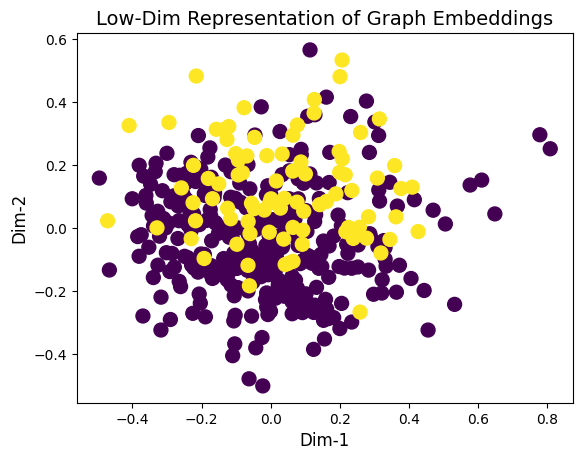

In [19]:
ugaf.plot_graph_embedding(source_embedding="lsme", dim_reduc_algo="pca", color_using_grpah_labels=True)

2023-10-20 13:27:54.182 | INFO     | ugaf.ugaf:plot_graph_embedding:200 - Plotting 2-dimensional graph embeddings
/home/ash/anaconda3/envs/ugaf/lib/python3.11/site-packages/ugaf/ugaf.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap='viridis', s=100)


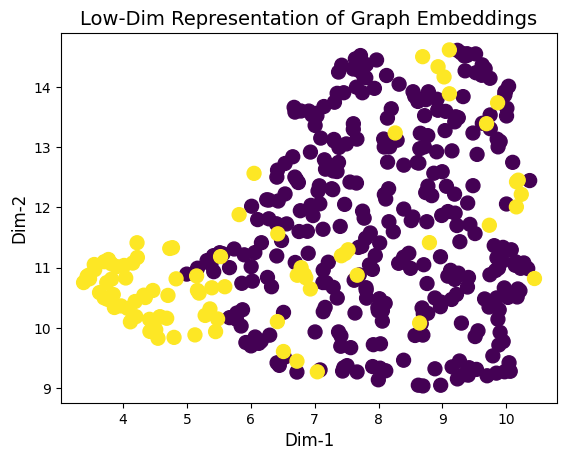

In [21]:
ugaf.plot_graph_embedding(source_embedding="lsme", dim_reduc_algo="umap", color_using_grpah_labels=True)

2023-10-20 13:28:00.268 | INFO     | ugaf.ugaf:plot_graph_embedding:200 - Plotting 2-dimensional graph embeddings
/home/ash/anaconda3/envs/ugaf/lib/python3.11/site-packages/ugaf/ugaf.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap='viridis', s=100)


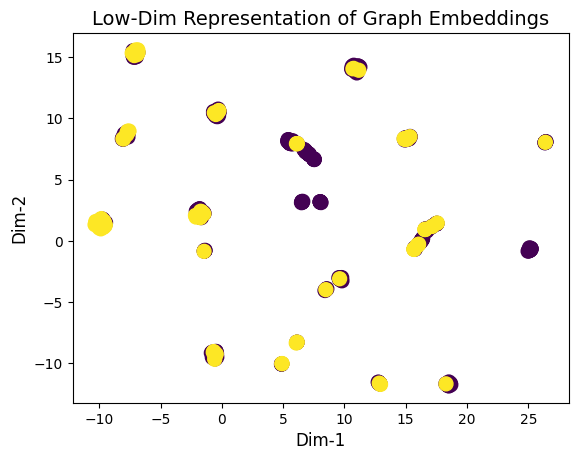

In [22]:
ugaf.plot_graph_embedding(source_embedding="node2vec", dim_reduc_algo="umap", color_using_grpah_labels=True)

## Classification

If you have labels for the graphs in the graph collection, you can use UGAF's built-in classifiers to build simple classifiers for quick analysis of the graph embeddings.
This can be done using the method `build_classifier` which takes as input `classifier_type` and `source_embedding` as input. Here is an example:

In [23]:
res = ugaf.build_classifier(classifier_type="decision_tree_classifier", source_embedding="lsme")

2023-10-20 13:34:13.516 | INFO     | ugaf.ugaf:build_classifier:246 - Building classifier


{'accuracy': 0.8271604938271605, 'precision': 0.5, 'recall': 0.35714285714285715, 'f1': 0.6576086956521738}


In [ ]:
print(res)